<font color='blue'> **Zahasky_08_________________b_________________** </font> 

In [1]:
import flopy; import sys; import pathlib; import os; import time; import numpy as np; import matplotlib.pyplot as plt ; from pathlib import Path ; import pandas as pd
EXF='E:\\15_REPOS\\00_BETAMI\\bin\\MF2005.exe'   ; EXT='E:\\15_REPOS\\00_BETAMI\\bin\\mt3d-usgs_1.1.0_64.exe'  ; _R=Path("_R"); _R.mkdir(exist_ok=True)  ; import gstools as gs  
TA=Path("_R/_08b"); TA.mkdir(exist_ok=True)       ; REF1= ('E:/15_REPOS/02_Beta-Me/data/Madison')    ; D1=os.path.join(REF1,'A_sig100.csv')  ; D2 = os.path.join(REF1,'A_sig100000.csv')
import matplotlib.ticker as ticker

In [5]:
import gstools as gs
XX= range(20); ZZ=range(40) ; np.arange(200) * 0.5 ; model = gs.Gaussian(dim=2, var=1, len_scale=5)  ; SR3 = gs.SRF(model, seed=20170519) ; FIELD3 = SR3.structured([XX, ZZ])
VA2 = [0.1, .5, 1, 2, 4]    ; T1A=SR3.transform("discrete", store="f2", values=VA2, thresholds="equal")                                   ; O1A=T1A.reshape(1,20,40);

XX = range(20);ZZ=range(40)   ; M = gs.Exponential(dim=2, var=2, len_scale=10, nugget=.2, angles=30)    ; S3 = gs.SRF(M)                  ; F3 =S3.structured([XX, ZZ])  
VA1 = np.linspace(np.min(S3.field), np.max(S3.field), 5)                                                                                  ; T3 =S3.transform("discrete",store="f1",values=VA1)
VA2 = [1e-5, 1e-3, 1, 2, 10]                             ;T2A=S3.transform("discrete", store="f2", values=VA2, thresholds="equal")        ;T2AL=np.log(T2A)   ;O2A=T2A.reshape(1,20,40)
VA3 = [1e-5, 1e-3, 1e-0]    ; TH = [-1, 1e-5]            ;T2B=S3.transform("discrete", store="f3", values=VA3, thresholds=TH)             ;T2BL=np.log(T2B)   ;O2B=T2B.reshape(1,20,40)  


'''XX = range(20);ZZ=range(40)   ; M = gs.Exponential(dim=2, var=4, len_scale=[50, 1, 3], nugget=0, angles=np.pi / 2)    ; S3 = gs.SRF(M)        ; F3  =S3.structured([XX, ZZ])  
VA1 = np.linspace(np.min(S3.field), np.max(S3.field), 5)                                                                                      ; T3  =S3.transform("discrete",store="f1",values=VA1)
VA2 = [1e-7, 1e-2, 1e-0, 2, 10]                                     ; T2A=S3.transform("discrete", store="f2", values=VA2, thresholds="equal")    ; T2AL=np.log(T2A)*-1 ;O2A=T2A.reshape(1,20,40)
VA3 = [1e-7, 1e-2, 1e-0, 2, 10]        ; TH = [-1, 1,2,3]           ; T2B=S3.transform("discrete", store="f3", values=VA3, thresholds=TH)         ; T2BL=np.log(T2B)*-1 ;O2B=T2B.reshape(1,20,40)
VA4 = [1e-7, 1e-2, 1e-1, 1e-0, 10]  ; TH = [1e-8,1e-6,1e-4,1e-1] ; T2C=S3.transform("discrete", store="f3", values=VA4, thresholds="equal")    ; T2CL=np.log(T2C)*-1 ;O2C=T2C.reshape(1,20,40)

fig = plt.figure(figsize=(14,6), dpi=120)                       ; SH = 0.25               
ax=fig.add_subplot(131); im=plt.imshow(T2AL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()
ax=fig.add_subplot(132); im=plt.imshow(T2BL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()
ax=fig.add_subplot(133); im=plt.imshow(T2CL,cmap='PuOr') ;cb=plt.colorbar(im, format=ticker.ScalarFormatter(useOffset=True, useMathText=True),shrink=SH)  ;plt.axis('off') ; cb.formatter.set_powerlimits((0, 0)) ; cb.update_ticks()
plt.tight_layout();plt.show()   ''' ; TT1=T2A  ;OT1=O2A  ; OT2 = O2B

In [6]:
'''pd.DataFrame(T2A).to_csv(TA/"T2A.csv") ; pd.DataFrame(T2B).to_csv(TA/"T2B.csv") ; pd.DataFrame(T2C).to_csv(TA/"T2C.csv")
print('XY__:',T2A.shape, f"  Mean__:{np.mean(T2A):.1e}", f"  MED__:{np.median(T2A)}",f"     SD__:{np.std(T2A):.1e}", f"     MIN__:{np.min(T2A)}",f"  MAX__:{np.max(T2A)}")
print('XY__:',T2B.shape, f"  Mean__:{np.mean(T2B):.1e}", f"  MED__:{np.median(T2B)}",f"     SD__:{np.std(T2B):.1e}", f"     MIN__:{np.min(T2B)}",f"  MAX__:{np.max(T2B)}")
print('XY__:',T2C.shape, f"  Mean__:{np.mean(T2C):.1e}", f"  MED__:{np.median(T2C)}",f"     SD__:{np.std(T2C):.1e}", f"     MIN__:{np.min(T2C)}",f"  MAX__:{np.max(T2C)}")
'''

'pd.DataFrame(T2A).to_csv(TA/"T2A.csv") ; pd.DataFrame(T2B).to_csv(TA/"T2B.csv") ; pd.DataFrame(T2C).to_csv(TA/"T2C.csv")\nprint(\'XY__:\',T2A.shape, f"  Mean__:{np.mean(T2A):.1e}", f"  MED__:{np.median(T2A)}",f"     SD__:{np.std(T2A):.1e}", f"     MIN__:{np.min(T2A)}",f"  MAX__:{np.max(T2A)}")\nprint(\'XY__:\',T2B.shape, f"  Mean__:{np.mean(T2B):.1e}", f"  MED__:{np.median(T2B)}",f"     SD__:{np.std(T2B):.1e}", f"     MIN__:{np.min(T2B)}",f"  MAX__:{np.max(T2B)}")\nprint(\'XY__:\',T2C.shape, f"  Mean__:{np.mean(T2C):.1e}", f"  MED__:{np.median(T2C)}",f"     SD__:{np.std(T2C):.1e}", f"     MIN__:{np.min(T2C)}",f"  MAX__:{np.max(T2C)}")\n'

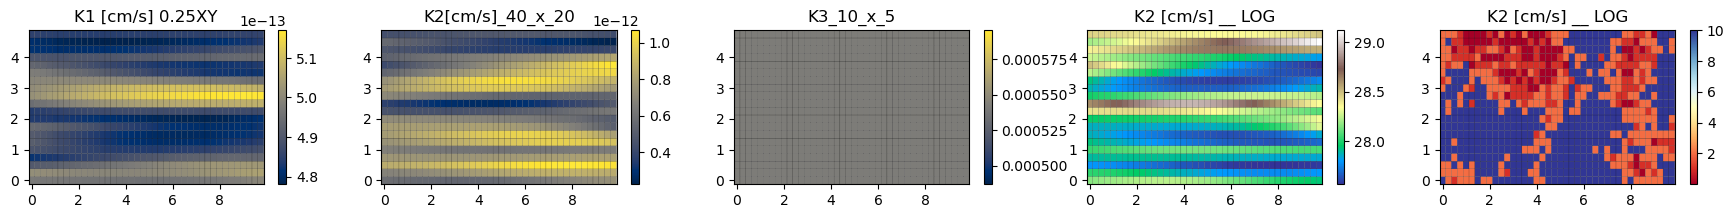

In [7]:
NO=np.loadtxt(D1,delimiter=',')   ;R= int(NO[-2])  ;C= int(NO[-1]) ;NO=NO[0:-2]   ;MO1=NO.reshape(1,R,C)   ;HK1=MO1*(1000*9.81*100/8.9E-4)   ;   
NO=np.loadtxt(D2,delimiter=',')   ;R= int(NO[-2])  ;C= int(NO[-1]) ;NO=NO[0:-2]   ;MO2=NO.reshape(1,R,C)   ;HK2=MO2*(1000*9.81*100/8.9E-4)   ; nrow=R ; ncol=C  

II=np.exp(np.sum(np.log(HK1))/HK1.size)  ; HK0 = II*np.ones([1, 20, 40])           ;MO22=np.log(MO2[0,:,:])*-1
LGRID=[0.25,0.25] ; Lx=(ncol-1)*LGRID[1] ;Ly=(nrow-1)*LGRID[0]                     ;y,x = np.mgrid[slice(0,Ly+LGRID[0],LGRID[0])   ,slice(0,Lx+LGRID[1],LGRID[1])]

fig = plt.figure(figsize=(22, 2))                                         
ax=fig.add_subplot(151) ; plt.pcolor(x,y,MO1[0,:,:],cmap='cividis',shading='auto',edgecolor='k',linewidth=0.1)  ;plt.colorbar() ;plt.title('K1 [cm/s] 0.25XY')
ax=fig.add_subplot(152) ; plt.pcolor(x,y,MO2[0,:,:],cmap='cividis',shading='auto',edgecolor='k',linewidth=0.1)  ;plt.colorbar() ;plt.title('K2[cm/s]_'+ '%1.0f' %(ncol) +'_x_'+'%1.0f' %(nrow))

ax=fig.add_subplot(153) ; plt.pcolor(x,y,HK0[0,:,:],cmap='cividis',shading='auto',edgecolor='k',linewidth=0.1)  ;plt.colorbar() ;plt.title('K3_'+ '%1.0f' %(Lx) +'_x_'+'%1.0f' %(Ly)) 
ax=fig.add_subplot(154) ; plt.pcolor(x,y,MO22      ,cmap='terrain',shading='auto',edgecolor='k',linewidth=0.1)  ;plt.colorbar() ;plt.title('K2 [cm/s] __ LOG') 
ax=fig.add_subplot(155) ; plt.pcolor(x,y,TT1       ,cmap='RdYlBu',shading='auto',edgecolor='k',linewidth=0.1)  ;plt.colorbar() ;plt.title('K2 [cm/s] __ LOG') ; plt.show()

In [ ]:
delv = 0.25  ;delr = 0.25 ;delc = 1  ; VV = 0.01 ;  TRPT =0.1 ; itype= -1 ; DISP = 0.01; DISP = 0.2                                       ; itmuni=1; lenuni=3 ;MTU='S';MTV='CM'
PERLEN_T = [60*3,60*58]        ; NPER_T = len(PERLEN_T)   ; NPRS = 100
PERLEN_F = [np.sum(PERLEN_T)]  ; NPER_F = len(PERLEN_F)   ; TIMPRS=np.linspace(0,np.sum(PERLEN_F), NPRS, endpoint = False)  ; print('PERLEN_T :',PERLEN_T, 'PERLEN_F :',PERLEN_F)

In [ ]:
def model_2D(DIR, PERLEN_T, HK, VV, DISP, TRPT, itype):
    
    HK_size = HK.shape ;nlay=HK_size[0] ;nrow=HK_size[1] ; ncol=HK_size[2]         ; IB = np.ones((nlay, nrow, ncol) , dtype=int)        ; IB[0,:,0]=-1 ;IB[0,:,-1] = -1      
    K_MEAN=np.exp(np.sum(np.log(HK))/HK.size) ;RO=0.3 ;q=VV*RO ;Lx=(ncol-1)*delr   ; IC = np.zeros((nlay,nrow,ncol),dtype=float)         ; H1   = q*Lx/K_MEAN  ;IC[0,:,0]= H1
    IBC = np.ones((nlay, nrow, ncol) , dtype=int)                                  ; SCONC = np.zeros((nlay, nrow, ncol), dtype=float)   ; C_IN = [1.0, 0.0] 
    
    CW1 = np.zeros((nrow, 5), dtype=float)
    for row in range(0, nrow):   CW1[row] = [0, row, 0, C_IN[0], itype]                           
    CW2 = CW1.copy()            ;CW2[:,3] =             C_IN[1]                    ; MTW_S = {0:CW1, 1:CW2}        ; MF=DIR+'_mf';MT=DIR+'_mt'  ;WS=os.path.join(TA,DIR)
    
    mf  = flopy.modflow.Modflow (modelname=MF, model_ws=WS, exe_name=EXF)
    dis = flopy.modflow.ModflowDis (mf, nlay=nlay, nrow=nrow, ncol=ncol, nper=NPER_F, delr=delr, delc=delc, top=0., botm=[0 - delv],perlen=PERLEN_F, itmuni=itmuni, lenuni=lenuni)
    bas = flopy.modflow.ModflowBas (mf, ibound=IB, strt=IC)  ; lpf = flopy.modflow.ModflowLpf(mf, hk=HK, laytyp=0)
    pcg = flopy.modflow.ModflowPcg (mf) ;lmt = flopy.modflow.ModflowLmt(mf) ; oc = flopy.modflow.ModflowOc(mf)                               ;mf.write_input() ;mf.run_model(silent=True) 

    mt  = flopy.mt3d.Mt3dms  (modelname=MT, model_ws=WS, exe_name=EXT, modflowmodel=mf)            ;mixelm = -1 ;adv=flopy.mt3d.Mt3dAdv(mt, mixelm=mixelm)
    btn = flopy.mt3d.Mt3dBtn (mt, icbund=IBC, prsity=RO, sconc=SCONC, tunit=MTU, lunit=MTV, nper=NPER_T, perlen=PERLEN_T, nprs=NPRS, timprs=TIMPRS ) 
    dsp = flopy.mt3d.Mt3dDsp (mt, al=DISP, trpt=TRPT)    ;ssm=flopy.mt3d.Mt3dSsm(mt,stress_period_data=MTW_S)   ;gcg=flopy.mt3d.Mt3dGcg(mt)  ;mt.write_input() ;mt.run_model(silent=True)

    if os.path.isfile(os.path.join(WS, 'MT3D001.UCN')):  os.remove(os.path.join(WS, 'MT3D001.UCN'))  
    mt.run_model(silent=True)
    
    hdobj  = flopy.utils.HeadFile(os.path.join(WS, MF+'.hds'))       ; HE1 = hdobj.get_data()               ; print("Inlet_H:"+str(H1) + "('Cm')") 
    ucnobj = flopy.utils.UcnFile(os.path.join(WS, 'MT3D001.UCN'))    ; TIMES = np.array(ucnobj.get_times())   ; CON0 = ucnobj.get_alldata()   ; return mf, mt, TIMES, CON0, HE1

In [ ]:
HK0=OT1     ;HK1=HK1     ;HK2 = OT2
DIR='ANI0'  ; mf,mt,TIMES,CON0,HE0 = model_2D(DIR, PERLEN_T, HK0, VV, DISP, TRPT, itype)      ; M0 = np.transpose(np.mean([CON0[:,0,:,-1]],axis=2))
DIR='ANI1'  ; mf,mt,TIMES,CON1,HE1 = model_2D(DIR, PERLEN_T, HK1, VV, DISP, TRPT, itype)      ; M1=np.transpose(np.mean([CON1[:,0,:,-1]],axis=2))
DIR='ANI2'  ; mf,mt,TIMES,CON2,HE2 = model_2D(DIR, PERLEN_T, HK2, VV, DISP, TRPT, itype)      ; M2 = np.transpose(np.mean([CON2[:,0,:,-1]],axis=2)) 

In [ ]:
TIMES.shape

In [ ]:
W1 = 5 ; HH= HE1                                                                      ;VV1=np.min(HH[0]) ; VV2=np.max(HH[0])   ; LH=np.arange(VV1, VV2, VV2/5) ; T60=TIMES/60 ; LL={'Row':0}
fig = plt.figure(figsize=(18, 2), dpi=110)  
ax=fig.add_subplot(151) ;
#plt.plot(T60,M0,color='b',label='OT1')
plt.plot(T60,M1,color='r',label='K') ;plt.plot(T60,M2,label='OT2',color='green') ;
plt.xlabel('Time [min]') ;plt.legend()
ax=fig.add_subplot(152) ; plt.pcolor(x,y,TT1  ,cmap='RdYlBu',shading='auto',edgecolor='k')  ;plt.colorbar() ;plt.title('KO [cm/s] __ LOG') ; 
ax=fig.add_subplot(153);SU=flopy.plot.PlotCrossSection(model=mf,line=LL);UU=SU.contour_array(HH,levels=LH,colors='w') ;plt.clabel(UU,colors='w',fontsize=8); HV=SU.plot_array(HH,head=HH,cmap='RdYlBu');plt.title("H [XY]");plt.axis('off') 
ax=fig.add_subplot(154);SX=flopy.plot.PlotCrossSection(model=mf,line=LL);VK=SX.plot_array(CON0[W1]);SX.plot_grid();plt.colorbar(VK);SX.plot_ibound(head=HH);plt.title('1_t %1.0f'%(W1));plt.axis('off')
ax=fig.add_subplot(155);SX=flopy.plot.PlotCrossSection(model=mf,line=LL);VK=SX.plot_array(CON2[W1]);SX.plot_grid();plt.colorbar(VK)       ;plt.title('2_t %1.0f'%(W1)) ; plt.show()

In [ ]:
pd.DataFrame(CON0.reshape(CON0.shape[0],-1)).to_csv(TA/"CON0_all[0].csv")  ; pd.DataFrame(CON1.reshape(CON1.shape[0],-1)).to_csv(TA/"CON1_all[0].csv") 
pd.DataFrame(CON2.reshape(CON2.shape[0],-1)).to_csv(TA/"CON2_all[0].csv")

pd.DataFrame(HE1[0,:,:]).to_csv (TA/"05_H_steady.csv")   ; pd.DataFrame(CON2 [-1,0,:,:]).to_csv (TA/"06_C16.csv") ; pd.DataFrame(HK2.reshape(nrow, ncol)).to_csv (TA/"01_anis_perm_field_.csv")  
pd.DataFrame(CON2.reshape(CON2.shape[0],-1)).to_csv (TA/"07_C_all_XY.csv") ; pd.DataFrame(TIMES).to_csv (TA/"08_TIMES.csv") ; pd.DataFrame(np.cumsum(PERLEN_T)).to_csv(TA/"09_Times_b.csv")
print(CON1.shape) ; CON1[:,0,:,-1].shape  ; CON0.shape      ; #print(HE1.shape)  ; print(CON2.shape) ; pd.DataFrame(CON0[12,0,:,:]).to_csv(TA/'CONC_12.csv') 